# Appropriation du code d'optimisation avec contrainte de forme


In [16]:
# Importing necessary packages
from score import score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Débruitage des images observées pour gamma = 0,5

In [29]:
gamma = 0.5

# Chargement des images observées
gals_obs = np.load("/Users/hk263532/Documents/score-master/examples/observed_galaxies.npy")
gals_truth = np.load("/Users/hk263532/Documents/score-master/examples/true_galaxies.npy")

# Liste des images débruitées avec l'algorithme
solution_list = list()
for obs, truth in zip(gals_obs,gals_truth):
    denoiser = score(gamma = gamma)
    denoiser.denoise(obs=obs,ground_truth = truth)
    solution_list.append(denoiser)


Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.10266
k                           4.00000
gamma                       0.50000
RIP                         0.00000
relative pixel MSE          0.09569
relative ellipticity error  0.39255
# of iterations             40.00000
total # of iterations       40.00000
Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.10266
k                           4.00000
gamma                       0.50000
RIP                         0.00000
relative pixel MSE          0.15228
relative ellipticity error  0.21404
# of iterations             40.00000
total # of iterations       40.00000
Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.10266
k                           4.00000
gamma                       0.

In [34]:
# Liste des différences d'ellipticité
ell_error = [sol.ell_solution - sol.ell_ground_truth for sol in solution_list]

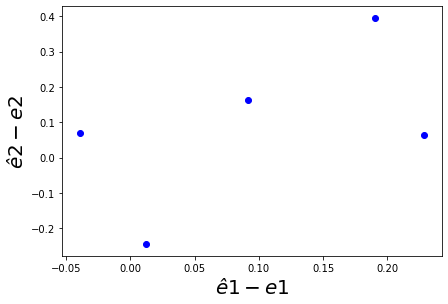

In [38]:
x = [ell[0] for ell in ell_error]
y = [ell[1] for ell in ell_error]

plt.plot(x,y,'bo')
plt.tight_layout()
plt.xlabel('$ê1-e1$', fontsize=20)
plt.ylabel('$ê2-e2$', fontsize=20)
plt.show()

In [43]:
mse_list = [((sol.solution - sol.ground_truth)**2).mean() for sol in solution_list]
def list_mean(l):
    return sum(l)/len(l)

print("La moyenne de l'erreur quadratique moyenne sur les 5 images est {}".format(list_mean(mse_list)))

La moyenne de l'erreur quadratique moyenne sur les 5 images est 0.0005372763316028056


In [44]:
ell_list = [(x**2).mean() for x in ell_error]

print("La moyenne de l'erreur quadratique d'ellipticité sur les 5 images est {}".format(list_mean(ell_list)))

La moyenne de l'erreur d'ellipticité sur les 5 images est 0.035175112521537356


# Déconvolution pour deux valeurs de gamma:

1) gamma = 1

In [60]:
# Chargement des données de psf
gals_psf = np.load("/Users/hk263532/Documents/score-master/examples/psfs.npy")

gamma = 1

# Liste des images débruitées avec l'algorithme
solution_deconv_list = list()
for obs, psf, truth in zip(gals_obs,gals_psf,gals_truth):
    deconvolver = score(gamma = gamma)
    deconvolver.deconvolve(obs=obs,ground_truth = truth, psf = psf)
    solution_deconv_list.append(deconvolver)

/Users/hk263532/Documents/score-master/cadmos_lib.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff[s] = trafo.adjoint_transform(temp, do_norm=False)


Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.13623
k                           4.00000
gamma                       1.00000
RIP                         0.00000
tolerance                   0.00000
halt criterion              0.00000
relative pixel MSE          0.02697
relative ellipticity error  0.35251
# of iterations             150.00000
total # of iterations       150.00000
Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.13613
k                           4.00000
gamma                       1.00000
RIP                         0.00000
tolerance                   0.00000
halt criterion              0.00000
relative pixel MSE          0.04309
relative ellipticity error  0.09248
# of iterations             150.00000
total # of iterations       150.00000
Running restoration...
RESTORATION PROCESS DONE
Running diag

In [61]:
# Liste des différences d'ellipticité
ell_error = [sol.ell_solution - sol.ell_ground_truth for sol in solution_deconv_list]

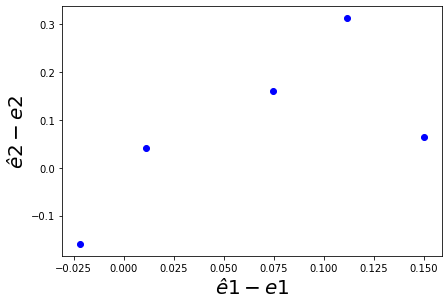

In [62]:
x = [ell[0] for ell in ell_error]
y = [ell[1] for ell in ell_error]

plt.plot(x,y,'bo')
plt.tight_layout()
plt.xlabel('$ê1-e1$', fontsize=20)
plt.ylabel('$ê2-e2$', fontsize=20)
plt.show()

In [63]:
mse_list = [((sol.solution - sol.ground_truth)**2).mean() for sol in solution_deconv_list]
def list_mean(l):
    return sum(l)/len(l)

print("La moyenne de l'erreur quadratique moyenne sur les 5 images est {}".format(list_mean(mse_list)))

La moyenne de l'erreur quadratique moyenne sur les 5 images est 0.00015284997231004065


In [64]:
ell_list = [(x**2).mean() for x in ell_error]

print("La moyenne de l'erreur quadratique d'ellipticité sur les 5 images est {}".format(list_mean(ell_list)))

La moyenne de l'erreur quadratique d'ellipticité sur les 5 images est 0.01970900588460674


2) gamma = 20

In [65]:
# Chargement des données de psf
gals_psf = np.load("/Users/hk263532/Documents/score-master/examples/psfs.npy")

gamma = 20

# Liste des images débruitées avec l'algorithme
solution_deconv_list = list()
for obs, psf, truth in zip(gals_obs,gals_psf,gals_truth):
    deconvolver = score(gamma = gamma)
    deconvolver.deconvolve(obs=obs,ground_truth = truth, psf = psf)
    solution_deconv_list.append(deconvolver)

/Users/hk263532/Documents/score-master/cadmos_lib.py:104: ComplexWarning: Casting complex values to real discards the imaginary part
  coeff[s] = trafo.adjoint_transform(temp, do_norm=False)


Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.00918
k                           4.00000
gamma                       20.00000
RIP                         0.00000
tolerance                   0.00000
halt criterion              0.00000
relative pixel MSE          0.02966
relative ellipticity error  0.16520
# of iterations             150.00000
total # of iterations       150.00000
Running restoration...
RESTORATION PROCESS DONE
Running diagnostic...
starlets generation         2.00000
beta                        0.00917
k                           4.00000
gamma                       20.00000
RIP                         0.00000
tolerance                   0.00000
halt criterion              0.00000
relative pixel MSE          0.09941
relative ellipticity error  0.00934
# of iterations             150.00000
total # of iterations       150.00000
Running restoration...
RESTORATION PROCESS DONE
Running di

In [66]:
# Liste des différences d'ellipticité
ell_error = [sol.ell_solution - sol.ell_ground_truth for sol in solution_deconv_list]

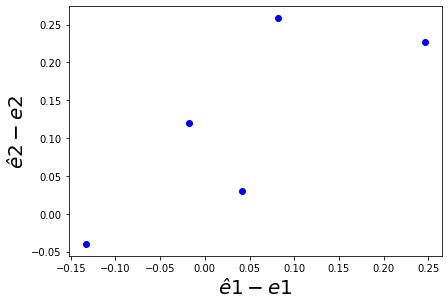

In [67]:
x = [ell[0] for ell in ell_error]
y = [ell[1] for ell in ell_error]

plt.plot(x,y,'bo')
plt.tight_layout()
plt.xlabel('$ê1-e1$', fontsize=20)
plt.ylabel('$ê2-e2$', fontsize=20)
plt.show()

In [68]:
mse_list = [((sol.solution - sol.ground_truth)**2).mean() for sol in solution_deconv_list]
def list_mean(l):
    return sum(l)/len(l)

print("La moyenne de l'erreur quadratique moyenne sur les 5 images est {}".format(list_mean(mse_list)))

La moyenne de l'erreur quadratique moyenne sur les 5 images est 0.00035084185016866665


In [69]:
ell_list = [(x**2).mean() for x in ell_error]

print("La moyenne de l'erreur quadratique d'ellipticité sur les 5 images est {}".format(list_mean(ell_list)))

La moyenne de l'erreur quadratique d'ellipticité sur les 5 images est 0.022255455600369393
